# Chapter 7. 다중분류(Softmax) - Iris 붓꽃 데이터 분류

## [실습내용]
: Iris 붓꽃 데이터의 꽃받침(Sepal), 꽃잎(Petal) feature를 바탕으로 Setosa, Virginica, Versicolor 3가지 종류로 분류하기

- 붓꽃 종류는 꽃받침(Sepal), 꽃잎(Petal)의 길이와 폭에 따라 종류가 나뉨
- Scikit-learn에서 제공하는 Iris 데이터에서는 품종당 50개의 샘플이 주어지고, 각 샘플은 4개의 feature, 3개의 레이블로 구성된 데이터

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense

#### 1. 데이터 생성

In [ ]:
# Scikit Learn에서 iris 데이터셋 로드

from sklearn.datasets import load_iris
data = load_iris()

print(data.keys())
# feature 이름
print(data.feature_names)
# target(label) 이름
print(data.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


데이터 셋 feature : sepal length (cm), sepal width (cm), petal length (cm), petal width (cm) <br>

데이터 셋 label: setosa, versicolor, virginica

In [ ]:
# input, label 데이터 지정
x = data.data
y = data.target

print(x.shape)
print(x[0:5,:])
print(y.shape)
print(y[0:5])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150,)
[0 0 0 0 0]


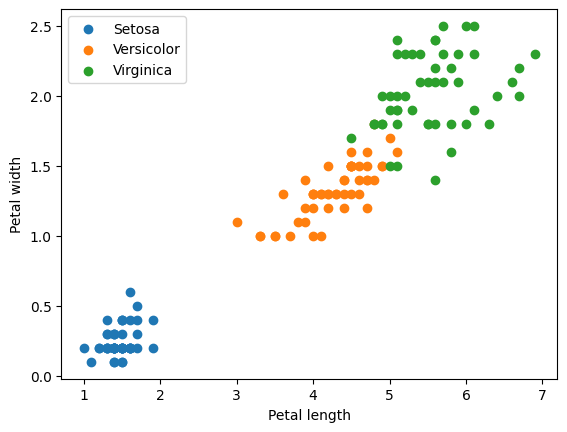

In [ ]:
# 데이터 시각화 - petal length, petal width

x0 = x[y==0]
x1 = x[y==1]
x2 = x[y==2]

plt.scatter(x0[:,2], x0[:,3], label='Setosa')
plt.scatter(x1[:,2], x1[:,3], label='Versicolor')
plt.scatter(x2[:,2], x2[:,3], label='Virginica')
plt.legend()
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [ ]:
# 훈련 데이터, 테스트 데이터 분리 (stratified sampling 사용)

from sklearn.model_selection import train_test_split

# 150개 데이터 중 20%를 테스트 데이터로 분리, y값에 따라 각 품종에서 10개씩 테스트 데이터 샘플링
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [ ]:
# 원핫 인코딩 - 각 레이블 값을 원핫 인코딩으로 [1,0,0], [0,1,0], [0,0,1]으로 변환
y_train= tf.one_hot(y_train,3)
y_test = tf.one_hot(y_test,3)

print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)


#### 2. 모델 정의

- 은닉층 2개(노드:10), 출력층 1개 (노드:3)의 구조
- 다중분류(3가지로 분류)를 위해 출력층 활성화 함수는 softmax를 사용

In [ ]:
model = Sequential([
    Dense(10, activation = 'relu', input_shape=(4,)),
    Dense(10, activation = 'relu'),
    Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 3. 모델 컴파일 & 훈련

In [ ]:
# 모델 컴파일
# 최적화 함수는 adam, loss function으로 categorical_crossentropy 사용
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# 모델 훈련
history= model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=300, verbose=1)

#### 4. 모델 평가

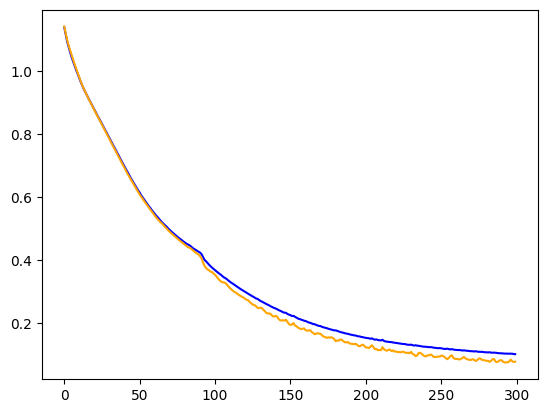

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, c='b')
plt.plot(val_loss ,c='orange')
plt.show()

In [ ]:
loss[-1], val_loss[-1]

(0.10116024315357208, 0.07714662700891495)

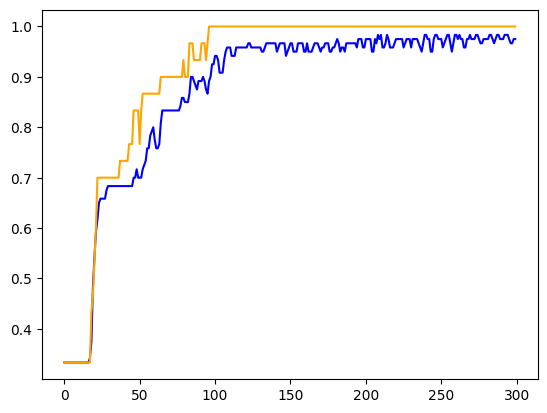

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(acc, c='b')
plt.plot(val_acc, c='orange')
plt.show()

In [ ]:
acc[-1], val_acc[-1]

(0.9750000238418579, 1.0)

In [ ]:
# test data로 모델 평가
model.evaluate(x_train, y_train)
loss, accuracy = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 37ms/step - loss: 0.0771 - acc: 1.0000


In [ ]:
print("Accuracy = {:.2f}".format(accuracy))
print("loss = {:.2f}".format(loss))

Accuracy = 1.00
loss = 0.08


### [결과 분석]

Iris 붓꽃 데이터의 꽃받침(Sepal), 꽃잎(Petal)의 4가지 feature를 바탕으로 3가지 종류( Setosa, Virginica, Versicolor)로 붓꽃 분류 작업을 진행하여 training loss와 validation loss, training accuracy, validation accuracy 값을 시각화 해 본 결과, <br>
최종 training loss 값은 0.10, validation loss 값은 0.07에 수렴하는 것을 확인할 수 있음.
또한, training accuracy는 0.97, validation accuracy는 1.0로 수렴하는 것 또한 확인됨. <br>
- train,test 데이터를 나눌 때, 전체 150개 데이터 중 20%를(30개) 테스트 데이터로 분리하여 사용하였고, y값에 따라 각 품종에서 10개씩 테스트 데이터 샘플링을 진행하였음
- loss, accuracy 모두 training과정보다 validation을 진행했을 때 더 결과가 좋게 나옴.


test 데이터로 evaluation을 진행한 결과, loss 값은 0.08, accuracy는 1.00이 나옴.